In [ ]:
import networkx as nx
import random
import time
start_time = time.time()
G = nx.grid_2d_graph(10, 10)
pos = dict((n, n) for n in G.nodes())
nx.set_node_attributes(G, pos, 'pos')
print(f"Graph creation time: {time.time() - start_time} seconds")

start_time = time.time()
for node in G.nodes():
    neighbors = list(G.neighbors(node))
    if len(neighbors) < 2:
        unconnected_neighbors = set(G.nodes()) - set(neighbors) - {node}
        for neighbor in random.sample(unconnected_neighbors, 2 - len(neighbors)):
            G.add_edge(node, neighbor)
print(f"Edge addition time: {time.time() - start_time} seconds")

vehicle_nodes = []
for i in range(30):
    vehicle_node = (random.randint(0, 9), random.randint(0, 9))
    G.add_node(vehicle_node, type='vehicle')
    vehicle_nodes.append(vehicle_node)

passenger_nodes = []
for i in range(50):
    passenger_node = (random.randint(0, 9), random.randint(0, 9))
    passenger_dest = (random.randint(0, 9), random.randint(0, 9))
    G.add_node(passenger_node, type='passenger', dest=passenger_dest)
    passenger_nodes.append(passenger_node)

# Schedule pickups and dropoffs for each vehicle
start_time = time.time()
for vehicle_node in vehicle_nodes:

    assigned_passengers = [node for node in G.nodes() if G.nodes[node].get('vehicle') == vehicle_node]

    # Using Dijkstra's algorithm
    if assigned_passengers:
        first_passenger = assigned_passengers[0]
        pickup_path = nx.shortest_path(G, vehicle_node, first_passenger, weight='weight', method='dijkstra')
        total_path = pickup_path
        for passenger_node in assigned_passengers:
            dest_path = nx.shortest_path(G, passenger_node, G.nodes[passenger_node]['dest'], weight='weight', method='dijkstra')
            total_path += dest_path[1:]

        print(f"Vehicle {vehicle_node} assigned to passengers {[n for n in assigned_passengers]} with destinations {[G.nodes[n]['dest'] for n in assigned_passengers]}")
        print(f"Total path: {total_path}\n")
print(f"Scheduling time: {time.time() - start_time} seconds")


Graph creation time: 0.001542806625366211 seconds
Edge addition time: 0.0004792213439941406 seconds
Scheduling time: 0.022047042846679688 seconds


In [ ]:
import networkx as nx
import random
G = nx.grid_2d_graph(10, 10)
pos = dict((n, n) for n in G.nodes())
nx.set_node_attributes(G, pos, 'pos')
for node in G.nodes():
    neighbors = list(G.neighbors(node))
    if len(neighbors) < 2:
        unconnected_neighbors = set(G.nodes()) - set(neighbors) - {node}
        for neighbor in random.sample(unconnected_neighbors, 2 - len(neighbors)):
            G.add_edge(node, neighbor)

vehicle_nodes = []
for i in range(60):
    vehicle_node = (random.randint(0, 9), random.randint(0, 9))
    G.add_node(vehicle_node, type='vehicle')
    vehicle_nodes.append(vehicle_node)
passenger_nodes = []
for i in range(50):
    passenger_node = (random.randint(0, 9), random.randint(0, 9))
    passenger_dest = (random.randint(0, 9), random.randint(0, 9))
    G.add_node(passenger_node, type='passenger', dest=passenger_dest)
    passenger_nodes.append(passenger_node)

for passenger_node in passenger_nodes:
    min_dist = float('inf')
    min_vehicle = None
    for vehicle_node in vehicle_nodes:
        dist = nx.astar_path_length(G, passenger_node, vehicle_node)
        if dist < min_dist:
            min_dist = dist
            min_vehicle = vehicle_node
    G.nodes[passenger_node]['vehicle'] = min_vehicle
for vehicle_node in vehicle_nodes:
    assigned_passengers = [node for node in G.nodes() if G.nodes[node].get('vehicle') == vehicle_node]

    # Find the shortest path to the first passenger
    if assigned_passengers:
        first_passenger = assigned_passengers[0]
        pickup_path = nx.shortest_path(G, vehicle_node, first_passenger)
        total_path = pickup_path
        for passenger_node in assigned_passengers:
            dest_path = nx.shortest_path(G, passenger_node, G.nodes[passenger_node]['dest'])
            total_path += dest_path[1:]

        print(f"Vehicle {vehicle_node} assigned to {len(assigned_passengers)} passengers with destinations:")
        for passenger_node in assigned_passengers:
            print(f"Passenger at {passenger_node} -> Destination: {G.nodes[passenger_node]['dest']}")
        print(f"Total path: {total_path}\n")


Vehicle (4, 8) assigned to 1 passengers with destinations:
Passenger at (4, 8) -> Destination: (3, 3)
Total path: [(4, 8), (4, 7), (4, 6), (4, 5), (4, 4), (4, 3), (3, 3)]

Vehicle (0, 2) assigned to 2 passengers with destinations:
Passenger at (0, 1) -> Destination: (2, 4)
Passenger at (0, 2) -> Destination: (6, 3)
Total path: [(0, 2), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (5, 3), (6, 3)]

Vehicle (8, 8) assigned to 1 passengers with destinations:
Passenger at (8, 8) -> Destination: (8, 8)
Total path: [(8, 8)]

Vehicle (5, 8) assigned to 1 passengers with destinations:
Passenger at (5, 7) -> Destination: (3, 9)
Total path: [(5, 8), (5, 7), (4, 7), (3, 7), (3, 8), (3, 9)]

Vehicle (6, 6) assigned to 4 passengers with destinations:
Passenger at (6, 5) -> Destination: (0, 1)
Passenger at (6, 6) -> Destination: (5, 9)
Passenger at (6, 7) -> Destination: (0, 2)
Passenger at (7, 6) -> Destination: (1, 3)
Total path: [(6, 6), (6, 5), (6, 4), (

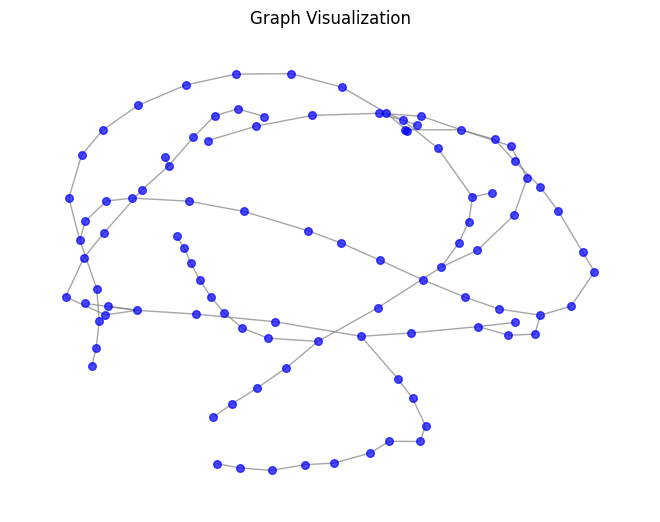

Graph Information:
Number of Nodes: 100
Number of Edges: 100
Average Clustering Coefficient: 0.0
Average Shortest Path Length: 18.01818181818182

Simulation Results:
Average Distance Traveled per Day: 0.5348125090414863
Average Number of Trips per Day: 60.0
Shortest Path between Node 2 and Node 9: [2, 3, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 37, 36, 35, 34, 33, 10, 9]


In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt

# Create a random graph with 100 nodes and average connectivity of 3
G = nx.connected_watts_strogatz_graph(100, 3, 0.2, seed=42)

# Assign random weights (traffic density) to edges
for u, v in G.edges():
    G[u][v]['weight'] = random.uniform(0.1, 1.0)

# Visualize the graph
pos = nx.spring_layout(G, seed=42)  # Position nodes using a spring layout
nx.draw(G, pos, with_labels=False, node_size=30, node_color='b', alpha=0.7, edge_color='gray')
plt.title("Graph Visualization")
plt.show()

# Print some information about the graph
print("Graph Information:")
print("Number of Nodes:", G.number_of_nodes())
print("Number of Edges:", G.number_of_edges())
print("Average Clustering Coefficient:", nx.average_clustering(G))
print("Average Shortest Path Length:", nx.average_shortest_path_length(G))

# Define parameters
num_vans = 60
num_reservations_per_hour = random.randint(450, 600)
num_simulated_hours = 24 * 7  # Simulate for one week
reservation_timeout = 15  # Minutes before printing a message for no availability

# Initialize vans
vans = [{'position': random.choice(list(G.nodes())), 'service_queue': [], 'path': []} for _ in range(num_vans)]

# Initialize variables to collect data
total_distance = 0
total_trips = 0
time_since_last_reservation = 0

# Simulation loop
for hour in range(num_simulated_hours):
    for _ in range(num_reservations_per_hour):
        pickup_node = random.choice(list(G.nodes()))
        dropoff_node = random.choice(list(G.nodes()))
        if pickup_node != dropoff_node:
            # Assign reservation to a random van
            van = random.choice(vans)
            van['service_queue'].append((pickup_node, dropoff_node))
            time_since_last_reservation = 0  # Reset the timer

    for van in vans:
        if len(van['service_queue']) > 0:
            # Simulate van movement (randomly select an edge)
            current_position = van['position']
            neighbors = list(G[current_position])
            next_position = random.choice(neighbors)
            van['path'].append(next_position)
            # Calculate distance based on edge weight
            total_distance += G[current_position][next_position]['weight']
            # Update van's position
            van['position'] = next_position
            # Remove completed trips
            van['service_queue'] = [(p, d) for p, d in van['service_queue'] if d != next_position]
            total_trips += 1

    time_since_last_reservation += 1

    # Check if 15 minutes have passed without reservations
    if time_since_last_reservation == reservation_timeout:
        print("No availability of vans after 15 minutes")

# Calculate averages
average_distance = total_distance / total_trips if total_trips > 0 else 0
average_trips = total_trips / num_simulated_hours

# Print results
print("\nSimulation Results:")
print("Average Distance Traveled per Day:", average_distance)
print("Average Number of Trips per Day:", average_trips)

# Find the shortest path between nodes 2 and 9 using Dijkstra's algorithm
shortest_path = nx.shortest_path(G, source=2, target=9, weight='weight', method='dijkstra')
print("Shortest Path between Node 2 and Node 9:", shortest_path)


In [ ]:
import random
import networkx as nx
G = nx.connected_watts_strogatz_graph(100, 4, 0.2, seed=42)

# Assign random weights (traffic density) to edges
for u, v in G.edges():
    G[u][v]['weight'] = random.uniform(0.1, 1.0)

# Define parameters
num_vans = 60
num_reservations_per_hour = random.randint(450, 600)
num_simulated_hours = 24 * 7  # Simulate for one week

# Initialize vans with scheduling and routing queues
vans = [{'position': random.choice(list(G.nodes())),
         'scheduling_queue': [],
         'routing_queue': [],
         'path': []} for _ in range(num_vans)]

# Initialize variables to collect data
total_distance = 0
total_trips = 0

# Simulation loop
for hour in range(num_simulated_hours):
    for _ in range(num_reservations_per_hour):
        pickup_node = random.choice(list(G.nodes()))
        dropoff_node = random.choice(list(G.nodes()))
        if pickup_node != dropoff_node:
            # Assign reservation to a random van
            van = random.choice(vans)
            van['scheduling_queue'].append((pickup_node, dropoff_node))

    for van in vans:
        if len(van['scheduling_queue']) > 0:
            # Move the first reservation from scheduling queue to routing queue
            pickup_node, dropoff_node = van['scheduling_queue'].pop(0)
            van['routing_queue'].append((pickup_node, dropoff_node))

        if len(van['routing_queue']) > 0:
            # Simulate van movement (randomly select an edge)
            current_position = van['position']
            neighbors = list(G[current_position])
            next_position = random.choice(neighbors)
            van['path'].append(next_position)
            # Calculate distance based on edge weight
            total_distance += G[current_position][next_position]['weight']
            # Update van's position
            van['position'] = next_position
            # Check if van has reached its destination
            if next_position == van['routing_queue'][0][1]:
                van['routing_queue'].pop(0)
                total_trips += 1

# Calculate averages
average_distance = total_distance / total_trips if total_trips > 0 else 0
average_trips = total_trips / num_simulated_hours

# Print results and queues
print("R4 - Varying Fleet Size to 60 Vans:")
print("Average Distance Traveled per Day:", average_distance)
print("Average Number of Trips per Day:", average_trips)

# Print scheduling and routing queues for each van
for i, van in enumerate(vans):
    print(f"Van {i}:")
    print("Scheduling Queue:", van['scheduling_queue'])
    print("Routing Queue:", van['routing_queue'])


R4 - Varying Fleet Size to 60 Vans:
Average Distance Traveled per Day: 101.74414623957891
Average Number of Trips per Day: 0.3392857142857143
Van 0:
Scheduling Queue: [(71, 24), (12, 64), (45, 9), (24, 77), (99, 86), (99, 96), (47, 85), (43, 10), (35, 11), (33, 38), (95, 87), (25, 45), (16, 6), (24, 85), (43, 48), (7, 62), (51, 70), (16, 42), (98, 14), (49, 51), (56, 51), (94, 21), (44, 24), (10, 57), (92, 51), (44, 5), (77, 16), (50, 36), (81, 13), (54, 90), (70, 94), (87, 50), (54, 34), (10, 0), (97, 66), (43, 94), (20, 7), (37, 92), (66, 74), (54, 20), (29, 32), (5, 81), (42, 60), (9, 12), (52, 84), (57, 19), (80, 27), (45, 25), (74, 51), (14, 37), (39, 48), (33, 56), (85, 92), (4, 89), (28, 54), (0, 94), (32, 35), (1, 91), (39, 24), (47, 32), (51, 34), (21, 74), (14, 27), (60, 48), (86, 10), (86, 20), (90, 74), (35, 52), (17, 77), (7, 86), (51, 79), (79, 59), (84, 28), (33, 79), (44, 49), (16, 30), (31, 44), (3, 57), (40, 82), (94, 72), (20, 19), (21, 7), (82, 62), (83, 69), (45, 3

In [ ]:
import random
import networkx as nx
G = nx.random_regular_graph(4, 100, seed=42)
for u, v in G.edges():
    G[u][v]['weight'] = random.uniform(0.1, 1.0)

# Define parameters
num_vans = 60
num_reservations_per_hour = random.randint(450, 600)
num_simulated_hours = 24 * 7

# Initialize vans
vans = [{'position': random.choice(list(G.nodes())), 'service_queue': [], 'path': []} for _ in range(num_vans)]
total_distance = 0
total_trips = 0

# Simulation loop
for hour in range(num_simulated_hours):
    for _ in range(num_reservations_per_hour):
        pickup_node = random.choice(list(G.nodes()))
        dropoff_node = random.choice(list(G.nodes()))
        if pickup_node != dropoff_node:
            # Assign reservation to a random van
            van = random.choice(vans)
            van['service_queue'].append((pickup_node, dropoff_node))

    for van in vans:
        if len(van['service_queue']) > 0:
# Use astar for distance calculation
            current_position = van['position']
            next_position = nx.astar_path(G, current_position, van['service_queue'][0][0], weight='weight')
            van['path'] += next_position[1:]
            total_distance += sum(G[u][v]['weight'] for u, v in zip(next_position[:-1], next_position[1:]))
            van['position'] = next_position[-1]
            # Remove completed trips
            van['service_queue'] = [(p, d) for p, d in van['service_queue'] if d != next_position[0]]
            total_trips += 1

# Calculate average distance
average_distance = total_distance / total_trips if total_trips > 0 else 0
print(" Varying Connectivity to 4:")
print("Average Distance Traveled per Day:", average_distance)


 Varying Connectivity to 4:
Average Distance Traveled per Day: 0.009490727169053002
